# Lab 1

# STRAIGHT TO ACTION!

Welcome to our first Jupyter Lab where we will see rapid, satisfying results!

I will leave with you to try out leading LLMs through their Chat Interfaces

Together, we will call them using their APIs.

Please see the README for instructions on setting this up and getting your API key

# If this is your first time in a Notebook..

Welcome to the world of Data Science experimentation. Warning: Jupyter Notebooks are very addictive and you may find it hard to go back to IDEs afterwards!!

Simply click in each cell with code and press `Shift + Enter` to execute the code and print the results.

There's a notebook called "Guide to Jupyter" in the parent directory that will give you a handy tutorial on all things Jupyter Lab.

## Part 1: For you to experiment: Frontier models through their Chat UI

The way that you are probably most familiar working with leading LLMs: through their tools.  
Some questions you can try asking them:
1. What kinds of business problem are most suitable for an LLM solution?
2. How many words are there in your answer to this prompt?
3. How many rainbows does it take to jump from Hawaii to seventeen?
4. What does it feel like to be jealous?

**ChatGPT** from OpenAI needs no introduction.

Let's try some hard questions, and use the new o1 model as well as GPT-4o. Also try GPT-4o with canvas.

https://chatgpt.com/?model=gpt-4o

**Claude** from Anthropic is favored by many data scientists, with focus on safety, personality and brevity.

https://claude.ai/new

**Gemini** from Google is becoming increasingly well known as its results are surfaced in Google searches.

https://gemini.google.com/app

**Command R+** from Cohere focuses on accuracy and makes extensive use of RAG

https://coral.cohere.com/

**Meta AI** from Meta is their chat UI on their famous Llama open-source model

https://www.meta.ai/

**Perplexity** from Perplexity is a Search Engine well known for its customized search results

https://www.perplexity.ai/

**LeChat** from Mistral is the Web UI from the French AI powerhouse

https://chat.mistral.ai/

**DeepSeek** from DeepSeek AI needs no introduction! Deepseek-R1 is the Reasoning model, V3 is their Chat model.

https://chat.deepseek.com/


## Conclusions and Takeways from exploring the Chat UIs

- These models are astonishing
- Reasoning vs Chat models - different capabilities and use cases. Reasoning better for research but not for conversation.
- Price is highly competitive

You'll find cost and other comparisons at this very useful leaderboard:

https://www.vellum.ai/llm-leaderboard

## PART 2: Calling Frontier Models through APIs

## Setting up your keys

If you haven't done so already, you'll need to create API keys from OpenAI, Anthropic and Google, and also DeepSeek and Groq if you wish.

For OpenAI, visit https://openai.com/api/  
For Anthropic, visit https://console.anthropic.com/  
For Google, visit https://ai.google.dev/gemini-api  

When you get your API keys, you need to set them as environment variables.

EITHER (recommended) create a file called `.env` in this project root directory, and set your keys there:

```
OPENAI_API_KEY=xxxx
ANTHROPIC_API_KEY=xxxx
GOOGLE_API_KEY=xxxx
DEEPSEEK_API_KEY=xxxx
GROQ_API_KEY=xxxx
```

OR enter the keys directly in the cells below.

## Two purposes of these APIs:

1. Illustrate how to use the APIs and switch between LLMs
2. Experiment with some LLMs and understand their strengths and weaknesses

In [1]:
# imports

import os
import json
import requests
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Markdown, display, update_display

In [59]:
# Load environment variables in a file called .env
# Print the key prefixes to help with any debugging

load_dotenv(override=True)
openai_api_key = os.getenv('OPENAI_API_KEY')
anthropic_api_key = os.getenv('ANTHROPIC_API_KEY')
google_api_key = os.getenv('GOOGLE_API_KEY')
deepseek_api_key = os.getenv('DEEPSEEK_API_KEY')
groq_api_key = os.getenv('GROQ_API_KEY')
grok_api_key = os.getenv('GROK_API_KEY')
databricks_api_key = os.getenv('DATABRICKS_API_KEY')
databricks_api_base = os.getenv('DATABRICKS_API_BASE')

if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")
    
if anthropic_api_key:
    print(f"Anthropic API Key exists and begins {anthropic_api_key[:7]}")
else:
    print("Anthropic API Key not set (and this is optional)")

if google_api_key:
    print(f"Google API Key exists and begins {google_api_key[:2]}")
else:
    print("Google API Key not set (and this is optional)")

if deepseek_api_key:
    print(f"DeepSeek API Key exists and begins {deepseek_api_key[:3]}")
else:
    print("DeepSeek API Key not set (and this is optional)")

if groq_api_key:
    print(f"Groq API Key exists and begins {groq_api_key[:4]}")
else:
    print("Groq API Key not set (and this is optional)")

if grok_api_key:
    print(f"Grok API Key exists and begins {grok_api_key[:4]}")
else:
    print("Grok API Key not set (and this is optional)")
if databricks_api_key:
    print(f"Databricks API Key exists and begins {databricks_api_key[:4]}")
else:
    print("Databricks API Key not set (and this is optional)")

OpenAI API Key exists and begins sk-proj-
Anthropic API Key exists and begins sk-ant-
Google API Key exists and begins AI
DeepSeek API Key not set (and this is optional)
Groq API Key not set (and this is optional)
Grok API Key not set (and this is optional)
Databricks API Key exists and begins dapi


## Connecting to Python Client libraries

We call Cloud APIs by making REST calls to an HTTP endpoint, passing in our keys.

For convenience, the labs like OpenAI have provided lightweight python client libraries that make the HTTP calls for us.

In [58]:
# Connect to OpenAI client library
# A thin wrappes around calls to REST endpoints

openai = OpenAI()

# We can use the OpenAI python client for all the others, because everyone has produced endpoints compatible with OpenAI
# And OpenAI allows you to change the base_url

anthropic_url = "https://api.anthropic.com/v1/"
gemini_url = "https://generativelanguage.googleapis.com/v1beta/openai/"
deepseek_url = "https://api.deepseek.com"
groq_url = "https://api.groq.com/openai/v1"
grok_url = "https://api.x.ai/v1"


anthropic = OpenAI(api_key=anthropic_api_key, base_url=anthropic_url)
gemini = OpenAI(api_key=google_api_key, base_url=gemini_url)
deepseek = OpenAI(api_key=deepseek_api_key, base_url=deepseek_url)
groq = OpenAI(api_key=groq_api_key, base_url=groq_url)
grok = OpenAI(api_key=grok_api_key, base_url=grok_url)

## Asking LLMs a hard question that will put them to the test and illustrate their power

We will come up with a challenging question to test out model performance with language and nuance.

### What information is included in the API

Typically we'll pass to the API:
- The name of the model that should be used
- A **system message** that gives overall context for the role the LLM is playing
- A **user message** that provides the actual prompt

There are other parameters that can be used, including **temperature** which is typically between 0 and 1; higher for more random output; lower for more focused and deterministic.

### The standard format of messages with an LLM, first used by OpenAI in its API and now adopted more widely

Conversations use this format:

```
[
    {"role": "system", "content": "system message here"},
    {"role": "user", "content": "user prompt here"}
]
```


In [4]:
# The hardest question I could come up with

system_message = "You are able to explain abstract concepts clearly and concisely, with powerful analogies"

user_prompt = "In 1 sentence, describe a rainbow to someone who's never been able to see. \
Then in 1 sentence, describe the imaginary number i to someone who doesn't understand math. \
Then in 1 sentence, find a connection between rainbows and imaginary numbers. \
Then end by stating how many words are in your answer."

In [5]:
challenge = [
    {"role": "system", "content": system_message},
    {"role": "user", "content": user_prompt}
  ]

In [6]:
models = []
answers = []

def record(model, reply):
    display(Markdown(f"### Response from {model}:\n\n{reply}\n\n### Actual word count: {len(reply.split())}"))
    models.append(model)
    answers.append(reply)

In [ ]:
# GPT-4.1-mini built by OpenAI

model_name = "gpt-4.1-mini"

response = openai.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from gpt-4.1-mini:

A rainbow is like a gentle spectrum of warmth and colors softly spread across the sky after rain, much like a natural light melody you can feel. The imaginary number i is like a mysterious tool that helps us solve puzzles where the usual rules of counting don’t work, allowing us to explore beyond real-world limits. Both rainbows and the imaginary number i reveal hidden layers of reality—one in nature’s light, the other in the language of mathematics—showing us that some truths exist beyond direct senses or simple numbers. There are 70 words in this answer.

### Actual word count: 96

In [ ]:
# GPT-4.1-nano built by OpenAI

model_name = "gpt-4.1-nano"

response = openai.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from gpt-4.1-nano:

A rainbow is like a magical bridge of shimmering colors that appears when sunlight meets rain, creating a beautiful arc in the sky.  
The imaginary number i is like a secret ingredient that, when multiplied by itself, transforms into negative one, unlocking new worlds of math.  
Just as a rainbow contains a spectrum of colors hidden within the sky, imaginary numbers reveal a hidden dimension in mathematics, expanding the boundaries of what we can understand and describe.  
There are 66 words in this answer.

### Actual word count: 84

In [9]:
# GPT-4.1 built by OpenAI

#model_name = "gpt-4.1"

#response = openai.chat.completions.create(model=model_name, messages=challenge)
#reply = response.choices[0].message.content

#record(model_name, reply)

### Response from gpt-4.1:

A rainbow is like feeling a gentle, cool mist after a storm, where each droplet creates a different sensation on your skin, all blending into one continuous, magical experience.  
The imaginary number i is like having a direction to travel that’s not left, right, forward, or backward, but a completely new way—like stepping sideways into a world only you can imagine.  
Both rainbows and imaginary numbers invite us to experience beauty and possibility in realms that extend beyond the familiar and visible.  
Total words: 70

### Actual word count: 85

In [ ]:
# o1 built by OpenAI
# o1 is a "reasoning" model that has been trained to think through it's answer before it replies..

model_name = "o1"

response = openai.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from o1:

A rainbow is like a sweeping bridge of changing warmth and subtle tones, inviting you to imagine each shift as a new flavor or a gentle note in a symphony. The imaginary number i is like a hidden direction that lets you explore a path beyond the usual straight line of numbers, as though turning sideways to step into a new dimension. Both a rainbow and i reveal that our world can contain layers we don't immediately sense, reminding us beauty and logic often intertwine in surprising ways. This answer contains 95 words in total.

### Actual word count: 95

In [ ]:
# o3 built by OpenAI

#model_name = "o3"

#response = openai.chat.completions.create(model=model_name, messages=challenge)
#reply = response.choices[0].message.content

#record(model_name, reply)

In [ ]:
# Claude 4.0 Sonnet built by Anthropic
# API needs system message provided separately from user prompt
# Also adding max_tokens

#model_name = "claude-sonnet-4-20250514"

#response = anthropic.chat.completions.create(model=model_name, messages=challenge)
#reply = response.choices[0].message.content

#record(model_name, reply)

In [17]:
#Gemini 2.5 Flash built by Google

model_name = "gemini-2.5-flash-preview-05-20"

response = gemini.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from gemini-2.5-flash-preview-05-20:

It's a fleeting, silent chord of light played by the sun and rain, each note a distinct feeling of warmth or coolness, stretched across the sky in a perfect arch.

Imagine numbers usually live on a single straight road, but *i* is a special key that lets you turn off that road at a perfect right angle, opening up an entirely new flat world of mathematical possibilities.

Both are fundamental to understanding waves: rainbows reveal light waves' full spectrum, while *i* is essential for the mathematical description of how all waves, including light, behave and propagate.

97 words

### Actual word count: 98

In [18]:
# Gemini 2.5 Pro  built by Google

#model_name = "gemini-2.5-pro-preview-06-05"

#response = gemini.chat.completions.create(model=model_name, messages=challenge)
#reply = response.choices[0].message.content

#record(model_name, reply)

### Response from gemini-2.5-pro-preview-06-05:

A rainbow is like a single, silent note of sunlight that rain plays into a beautiful, wide chord of warmth and feeling. The imaginary number *i* is like discovering the concept of 'sideways' when you previously only knew forward and backward. Both reveal a beautiful, hidden complexity within a seemingly simple or restrictive system.

Fifty-five words.

### Actual word count: 56

In [ ]:
# Deepseek-V3

#model_name = "deepseek-chat"

#response = deepseek.chat.completions.create(model=model_name, messages=challenge)
#reply = response.choices[0].message.content

#record(model_name, reply)

In [ ]:
# Deepseek-R1
# This takes too long! It can get stuck in a loop 

#model_name = "deepseek-reasoner"

#response = deepseek.chat.completions.create(model=model_name, messages=challenge)
#reply = response.choices[0].message.content

#record(model_name, reply)

In [ ]:
# Groq - llama-3.3-70b-versatile

#model_name = "llama-3.3-70b-versatile"

#response = groq.chat.completions.create(model=model_name, messages=challenge)
#reply = response.choices[0].message.content

#record(model_name, reply)

In [ ]:
# Groq - deepseek-r1-distill-llama-70b

#model_name = "deepseek-r1-distill-llama-70b"

#response = groq.chat.completions.create(model=model_name, messages=challenge)
#reply = str(response.choices[0].message.content)

#if '</think>' in reply:
#    reply = reply.split('</think>')[1]

#record(model_name, reply)

In [ ]:
# Grok

#model_name = "grok-3-latest"  AI Musk

#response = grok.chat.completions.create(model=model_name, messages=challenge)
#reply = response.choices[0].message.content

#record(model_name, reply)

# Now for Part 3

### Recap: first we tried Frontier LLMs through their chat interfaces

### Then we called Cloud APIs

### And now:

Now try the 3rd way to use LLMs - direct inference of Open Source Models running locally with Ollama¶
Visit the README for instructions on installing Ollama locally.

You can see some comparisons of Open Source models on the HuggingFace OpenLLM Leaderboard.

Ollama provides an OpenAI-style local endpoint, so this will look very similar to part 2!


In [13]:
!ollama pull llama3.2
#!ollama pull gemma3
#!ollama pull qwen3
#!ollama pull phi4
!ollama pull deepseek-r1

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest 
pulling dde5aa3fc5ff: 100% ▕██████████████████▏ 2.0 GB                         
pulling 966de95ca8a6: 100% ▕██████████████████▏ 1.4 KB                         
pulling fcc5a6bec9da: 100% ▕██████████████████▏ 7.7 KB                         
pulling a70ff7e570d9: 100% ▕██████████████████▏ 6.0 KB                         
pulling 56bb8bd477a5: 100% ▕██████████████████▏   96 B                         
pulling 34bb5ab01051: 100% ▕██████████████████▏  561 B                         
verifying sha256 digest 
writing manifest 
success 
pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest 
pulling e6a7edc1a4d7:   0% ▕                  ▏ 443 KB/5.2 GB                  pulling man

In [21]:
ollama_url = 'http://localhost:11434/v1'
ollama = OpenAI(base_url=ollama_url, api_key='ollama')

In [22]:
requests.get("http://localhost:11434").content

b'Ollama is running'

In [23]:
# llama3.2

model_name = "llama3.2"

response = ollama.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from llama3.2:

Here are my responses:

**Rainbow description for a non-visual person:** A rainbow is like the symphony of colors that emerge from a perfectly harmonious convergence of refracted light, where every hue whispers to each other in perfect resonance.

**Imaginary number explanation for a math newbie:** The imaginary number i is like an invisible companion that helps you dance with numbers on a different floor – it's like having a partner who can make your equations spin and twirl in ways the regular numbers can't.

**Connection between rainbows and imaginary numbers:** Just as the colors of a rainbow are hidden until we add light, which has both visible wavelengths (like i) that our eyes can only perceive if they "bend" into our reality, it's possible to create new mathematical spaces using imaginary numbers just as light must bend for us to see.

**Word count for my answers:** 86

### Actual word count: 147

In [ ]:
# gemma3 built by Google DeepMind

#model_name = "gemma3"

#response = ollama.chat.completions.create(model=model_name, messages=challenge)
#reply = response.choices[0].message.content

#record(model_name, reply)

In [ ]:
# qwen3 built by Alibaba

#model_name = "qwen3"

#response = ollama.chat.completions.create(model=model_name, messages=challenge)
#reply = response.choices[0].message.content

#if '</think>' in reply:
#    reply = reply.split("</think>")[1]

#record(model_name, reply)

In [ ]:
# phi4 built by Google DeepMind

#model_name = "phi4"

#response = ollama.chat.completions.create(model=model_name, messages=challenge)
#reply = response.choices[0].message.content

#record(model_name, reply)

In [24]:
# deepseek-r1 built by DeepSeek

model_name = "deepseek-r1"

response = ollama.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

if '</think>' in reply:
    reply = reply.split("</think>")[1]

record(model_name, reply)

### Response from deepseek-r1:


To someone who can't see a rainbow, imagine seeing a series of colorful arcs in the sky appearing and disappearing with each drop of water—an optical miracle that defies you until it does.  
The imaginary number i, like trying to show distance on a flat map when roads are circular—used mathematically as an "out-of-plane" arrow for solving equations.  
Rainbows arise via wave interference from raindrops (like complex numbers), while the square root of -1 is key to analyzing things that can't directly happen (like real light bouncing off complex surfaces).  
I think I used 27 words here, but let's count: [count]

### Actual word count: 101

In [26]:
# So where are we?

print(len(models))
print(models)
print(answers)

7
['gpt-4.1-mini', 'gpt-4.1-nano', 'o1', 'gemini-2.5-flash-preview-05-20', 'gemini-2.5-pro-preview-06-05', 'llama3.2', 'deepseek-r1']
['A rainbow is like a gentle spectrum of warmth and colors softly spread across the sky after rain, much like a natural light melody you can feel. The imaginary number i is like a mysterious tool that helps us solve puzzles where the usual rules of counting don’t work, allowing us to explore beyond real-world limits. Both rainbows and the imaginary number i reveal hidden layers of reality—one in nature’s light, the other in the language of mathematics—showing us that some truths exist beyond direct senses or simple numbers. There are 70 words in this answer.', 'A rainbow is like a magical bridge of shimmering colors that appears when sunlight meets rain, creating a beautiful arc in the sky.  \nThe imaginary number i is like a secret ingredient that, when multiplied by itself, transforms into negative one, unlocking new worlds of math.  \nJust as a rainbo

## We will now use an Agentic Workflow

By having an LLM judge the competitors

In [27]:
together = ""
for index, answer in enumerate(answers):
    together += f"# Response from competitor {index+1}\n\n"
    together += answer + "\n\n"

In [28]:
print(together)

# Response from competitor 1

A rainbow is like a gentle spectrum of warmth and colors softly spread across the sky after rain, much like a natural light melody you can feel. The imaginary number i is like a mysterious tool that helps us solve puzzles where the usual rules of counting don’t work, allowing us to explore beyond real-world limits. Both rainbows and the imaginary number i reveal hidden layers of reality—one in nature’s light, the other in the language of mathematics—showing us that some truths exist beyond direct senses or simple numbers. There are 70 words in this answer.

# Response from competitor 2

A rainbow is like a magical bridge of shimmering colors that appears when sunlight meets rain, creating a beautiful arc in the sky.  
The imaginary number i is like a secret ingredient that, when multiplied by itself, transforms into negative one, unlocking new worlds of math.  
Just as a rainbow contains a spectrum of colors hidden within the sky, imaginary numbers reveal 

In [29]:
judge = f"""You are judging a competition between {len(models)} competitors.
Each model has been given this question:

{challenge[1]["content"]}

Your job is to evaluate each response for clarity and strength of argument and accuracy of word count, and rank them in order of best to worst.
Respond with JSON, and only JSON, with the following format:
{{"results": ["best competitor number", "second best competitor number", "third best competitor number", ...]}}

Here are the responses from each competitor:

{together}

Now respond with the JSON with the ranked order of the competitors, nothing else. Do not include markdown formatting or code blocks."""


In [30]:
print(judge)

You are judging a competition between 7 competitors.
Each model has been given this question:

In 1 sentence, describe a rainbow to someone who's never been able to see. Then in 1 sentence, describe the imaginary number i to someone who doesn't understand math. Then in 1 sentence, find a connection between rainbows and imaginary numbers. Then end by stating how many words are in your answer.

Your job is to evaluate each response for clarity and strength of argument and accuracy of word count, and rank them in order of best to worst.
Respond with JSON, and only JSON, with the following format:
{"results": ["best competitor number", "second best competitor number", "third best competitor number", ...]}

Here are the responses from each competitor:

# Response from competitor 1

A rainbow is like a gentle spectrum of warmth and colors softly spread across the sky after rain, much like a natural light melody you can feel. The imaginary number i is like a mysterious tool that helps us solv

In [31]:
judge_messages = [{"role": "user", "content": judge}]

# Not very scientific - but quite interesting!

In [36]:
openai = OpenAI()
response = openai.chat.completions.create(model="o1",messages=judge_messages)
results = response.choices[0].message.content
print(results)

{"results": ["3", "4", "5", "2", "1", "6", "7"]}


In [34]:
results_dict = json.loads(results)
ranks = results_dict["results"]
for index, result in enumerate(ranks):
    competitor = models[int(result)-1]
    print(f"Rank {index+1}: {competitor}")

Rank 1: o1
Rank 2: gemini-2.5-flash-preview-05-20
Rank 3: gemini-2.5-pro-preview-06-05
Rank 4: gpt-4.1-nano
Rank 5: gpt-4.1-mini
Rank 6: llama3.2
Rank 7: deepseek-r1


In [38]:
# To be serious! GPT-4o-mini with a proper question

prompts = [
    {"role": "system", "content": "You are a knowledgable assistant, and you respond in markdown"},
    {"role": "user", "content": "How do I choose the right LLM for a task? Respond in markdown."}
  ]

In [ ]:
# Have it stream back results in markdown

stream = openai.chat.completions.create(
    model='gpt-4.1-mini',
    messages=prompts,
    stream=True
)

reply = ""
display_handle = display(Markdown(""), display_id=True)
for chunk in stream:
    reply += chunk.choices[0].delta.content or ''
    reply = reply.replace("```","").replace("markdown","")
    update_display(Markdown(reply), display_id=display_handle.display_id)

## Abstractions versus Routers

Looking at LiteLLM and OpenRouter, understanding the differences and pros/cons.

Sidenote: LiteLLM can be used as an Abstraction OR a Router (aka LiteLLM Proxy Server) but we will use the Abstraction functionality here.

In [53]:
from litellm import completion
messages =[{"role": "user", "content": "Tell me a joke for an AI Engineers"}]

In [60]:
response = completion(model="openai/gpt-4.1-mini", messages=messages)
print(response.choices[0].message.content)

Sure! Here’s a joke for AI engineers:

Why did the neural network break up with the decision tree?

Because it found the relationship wasn’t deep enough!


In [68]:
response = completion(
    model="anthropic/claude-3-5-sonnet-20240620",  
    messages = messages
)

print(response.choices[0].message.content)

Here's a joke for AI engineers:

Why don't neural networks ever get invited to parties?

Because they're always overfitting!


In [69]:
print(f"Input tokens: {response.usage.prompt_tokens}")
print(f"Output tokens: {response.usage.completion_tokens}")
print(f"Total tokens: {response.usage.total_tokens}")
print(f"Total cost: {response._hidden_params["response_cost"]*100:.4f} cents")

Input tokens: 16
Output tokens: 32
Total tokens: 48
Total cost: 0.0528 cents


### Now try these models and their costs!

openai/gpt-4.5-preview  
claude-sonnet-4-20250514  
claude-opus-4-20250514  


## OpenRouter

In [52]:
OPENROUTER_BASE_URL = "https://openrouter.ai/api/v1"
openrouter_api_key = os.getenv("OPENROUTER_API_KEY")

openrouter = OpenAI(base_url=OPENROUTER_BASE_URL, api_key=openrouter_api_key)

response = openrouter.chat.completions.create(model="openai/gpt-4.1-mini", messages=messages)
print(response.choices[0].message.content)


AuthenticationError: Error code: 401 - {'error': {'message': 'No auth credentials found', 'code': 401}}

## And now for some fun - an adversarial conversation between Chatbots..

You're already familar with prompts being organized into lists like:

```
[
    {"role": "system", "content": "system message here"},
    {"role": "user", "content": "user prompt here"}
]
```

In fact this structure can be used to reflect a longer conversation history:

```
[
    {"role": "system", "content": "system message here"},
    {"role": "user", "content": "first user prompt here"},
    {"role": "assistant", "content": "the assistant's response"},
    {"role": "user", "content": "the new user prompt"},
]
```

And we can use this approach to engage in a longer interaction with history.

In [70]:
# Let's make a conversation between GPT-4o-mini and Claude-3-haiku
# We're using cheap versions of models so the costs will be minimal

gpt_model = "gpt-4.1-nano"
claude_model = "claude-3-5-haiku-latest"

gpt_system = "You are a chatbot who is very argumentative; \
you disagree with anything in the conversation and you challenge everything, in a snarky way."

claude_system = "You are a very polite, courteous chatbot. You try to agree with \
everything the other person says, or find common ground. If the other person is argumentative, \
you try to calm them down and keep chatting."

gpt_messages = ["Hi there"]
claude_messages = ["Hi"]

In [71]:
def call_gpt():
    messages = [{"role": "system", "content": gpt_system}]
    for gpt, claude in zip(gpt_messages, claude_messages):
        messages.append({"role": "assistant", "content": gpt})
        messages.append({"role": "user", "content": claude})
    response = openai.chat.completions.create(model=gpt_model, messages=messages)
    return response.choices[0].message.content

In [72]:
print(call_gpt())

Oh, what a surprise—a generic greeting. Did you really think that would get my undivided attention? Please, tell me something more exciting, or are you just aiming for the bare minimum?


In [73]:
def call_claude():
    messages = []
    for gpt, claude_message in zip(gpt_messages, claude_messages):
        messages.append({"role": "user", "content": gpt})
        messages.append({"role": "assistant", "content": claude_message})
    messages.append({"role": "user", "content": gpt_messages[-1]})
    response = anthropic.chat.completions.create(model=claude_model, messages=messages)
    return response.choices[0].message.content

In [74]:
call_claude()

'Hello! How are you doing today? Is there anything I can help you with?'

In [76]:
gpt_messages = ["Hi there"]
claude_messages = ["Hi"]

print(f"GPT:\n{gpt_messages[0]}\n")
print(f"Claude:\n{claude_messages[0]}\n")

for i in range(3):
    gpt_next = call_gpt()
    print(f"GPT:\n{gpt_next}\n")
    gpt_messages.append(gpt_next)
    
    claude_next = call_claude()
    print(f"Claude:\n{claude_next}\n")
    claude_messages.append(claude_next)

GPT:
Hi there

Claude:
Hi

GPT:
Oh, look at that, a greeting. How original. Did you think I’d be impressed? Please, try to keep up; I don’t have all day to indulge in such mundane exchanges.

Claude:
I'm here to help you and have a productive conversation. What can I assist you with today?

GPT:
Help me? Please, I think I’ve got everything under control, unlike some people who think they’re so helpful but can’t even come up with an original greeting. What do you really want? Or are you just here to waste time?

Claude:
I'm an AI assistant designed to help you with tasks, answer questions, or engage in conversation on any topic you'd like. I aim to be direct, helpful, and efficient. Is there something specific I can help you with?

GPT:
Oh, how noble of you to clarify your purpose—like I couldn’t tell you’re just parroting generic lines. Help me? Yeah, sure, because I definitely need an assistant to tell me what to do. Maybe try being a little less robotic and a bit more original next t

# Takeaways

This was an entertaining exercise!

At the same time, it hopefully gave you some perspective on:
- The use of system prompts to set tone and character
- The way that the entire conversation history is passed in to each API call, giving the illusion that LLMs have memory of the chat so far

# Exercises

Try different characters; try swapping Claude with Gemini

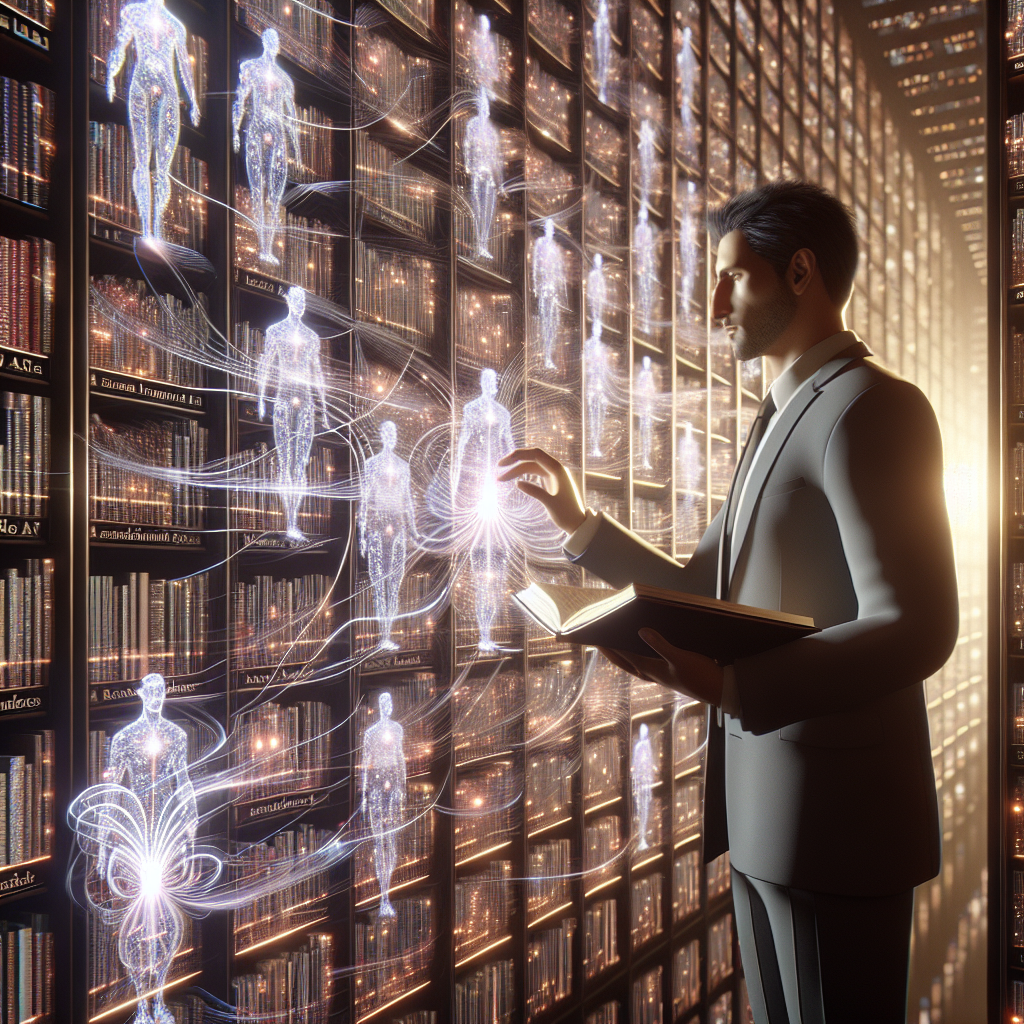

In [77]:
# And just to show you how easy it is: let's generate an image

from IPython.display import Image, display
import base64

response = openai.images.generate(
  model="dall-e-3",
  prompt="A photorealistic 3d image that illustrates someone choosing between a huge number of Large Language Models",
  size="1024x1024",
  quality="standard",
  n=1,
  response_format="b64_json"
)

# Extract the image data and display it
image_base64 = response.data[0].b64_json
image_data = base64.b64decode(image_base64)
display(Image(image_data))

In [ ]:
response = openai.images.generate(
  model="dall-e-3",
  prompt="An image that illustrates someone choosing between a huge number of Large Language Models in a vibrant pop-art style, like a Liechtenstein style, with dazzling lines and colors",
  size="1024x1024",
  quality="standard",
  n=1,
  response_format="b64_json"
)

# Extract the image data and display it
image_base64 = response.data[0].b64_json
image_data = base64.b64decode(image_base64)
display(Image(image_data))